<a href="https://colab.research.google.com/github/nicolerene91/Python_Notebook_Sewell/blob/main/MNIST_CNN_from_folder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_3 (Dense)             (None, 4096)             

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


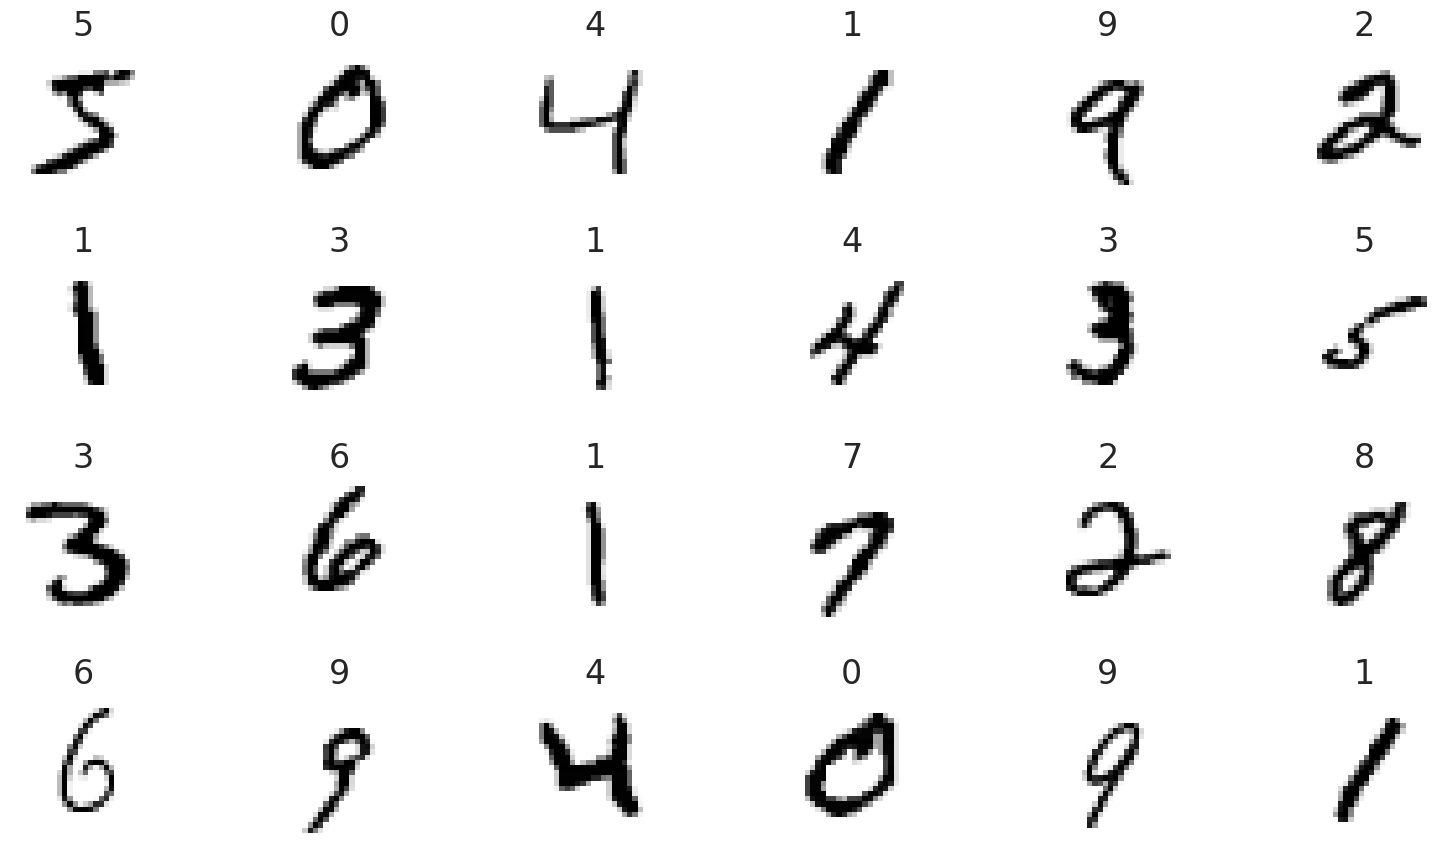

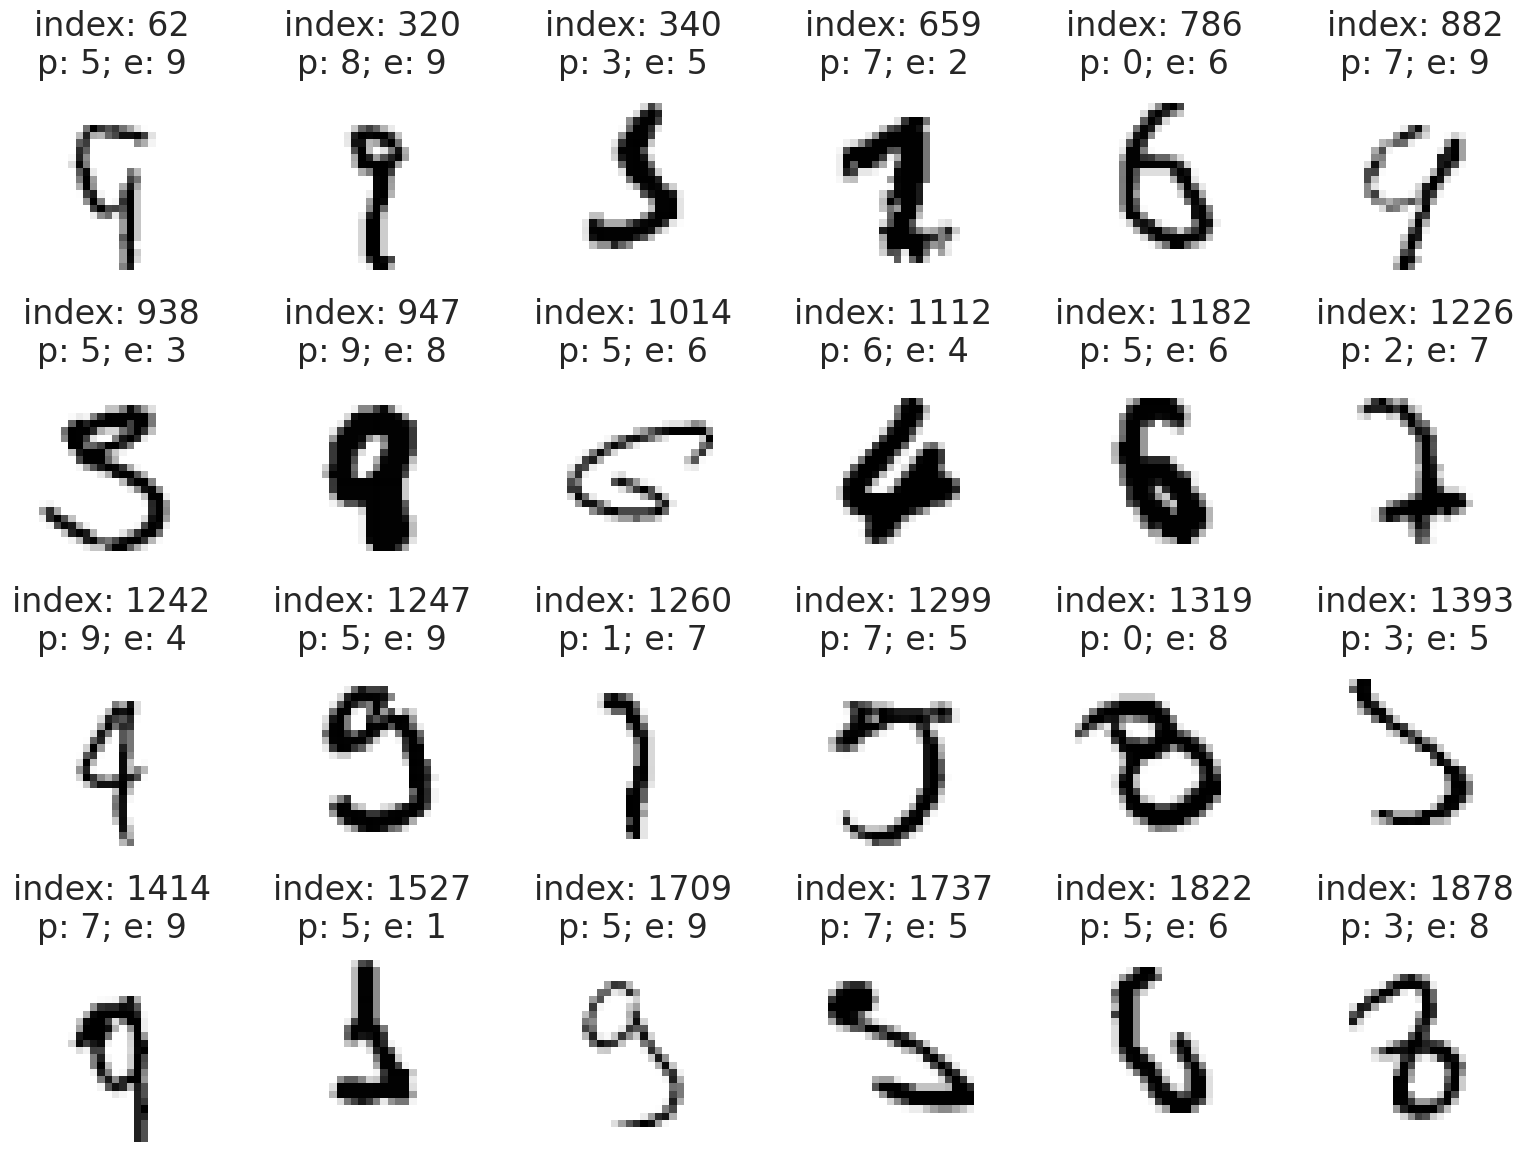

In [3]:
# modified Section 16.7 MNIST_CNN.ipynb from examples folder
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape
y_train.shape
X_test.shape
y_test.shape
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=2)
import numpy as np
index = np.random.choice(np.arange(len(X_train)), 24, replace=False)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 9))

for item in zip(axes.ravel(), X_train, y_train):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()
X_train = X_train.reshape((60000, 28, 28, 1))
X_train.shape
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((10000, 28, 28, 1))
X_test.shape
X_test = X_test.astype('float32') / 255
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape
y_train[0]
y_test = to_categorical(y_test)
y_test.shape
from tensorflow.keras.models import Sequential
cnn = Sequential()
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
cnn.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu',
               input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=4096, activation='relu'))
cnn.add(Dense(units=128, activation='relu'))
cnn.add(Dense(units=10, activation='softmax'))
cnn.summary()
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(cnn, to_file='convnet.png', show_shapes=True,
           show_layer_names=True)
Image(filename='convnet.png')
cnn.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5, batch_size=64, validation_split=0.1)
loss, accuracy = cnn.evaluate(X_test, y_test)
loss
accuracy
predictions = cnn.predict(X_test)
y_test[0]
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')
images = X_test.reshape((10000, 28, 28))
incorrect_predictions = []

for i, (p, e) in enumerate(zip(predictions, y_test)):
    predicted, expected = np.argmax(p), np.argmax(e)

    if predicted != expected:
        incorrect_predictions.append((i, images[i], predicted, expected))
len(incorrect_predictions)
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(16, 12))

for axes, item in zip(axes.ravel(), incorrect_predictions):
    index, image, predicted, expected = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(f'index: {index}\np: {predicted}; e: {expected}')
plt.tight_layout()
def display_probabilities(prediction):
    for index, probability in enumerate(prediction):
        print(f'{index}: {probability:.10%}')
display_probabilities(predictions[495])
display_probabilities(predictions[583])
display_probabilities(predictions[625])
cnn.save('mnist_cnn.h5')